In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

In [149]:
data = pd.read_csv('dataset.csv')

In [150]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [151]:
data.shape

(375, 6)

In [152]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [153]:
data = data.dropna()
data.shape

(373, 6)

In [154]:
data[data.duplicated()].shape

(49, 6)

In [155]:
data = data.drop_duplicates(keep='first')
data.shape

(324, 6)

In [156]:
corr = data[['Age', 'Years of Experience', 'Salary']].corr()
corr

,Age,Years of Experience,Salary
Age,1.000000,0.979192,0.916543
Years of Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

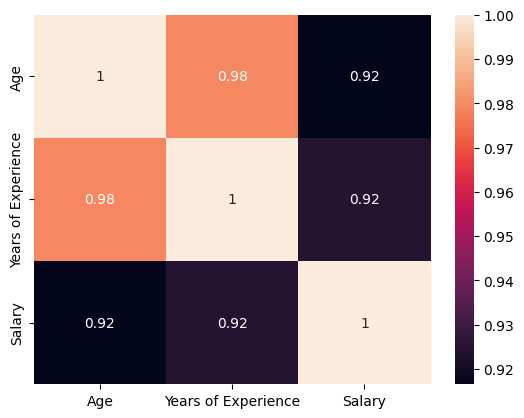

In [157]:
sns.heatmap(corr, annot=True)

Text(0.5, 1.0, 'Age Chart')

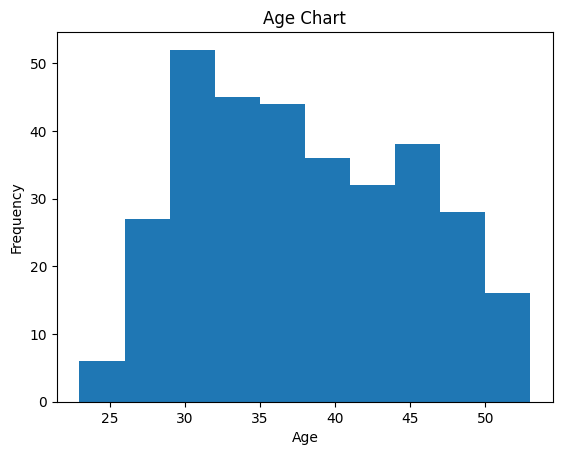

In [158]:
data.Age.plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Chart')

Text(0.5, 1.0, 'Age Chart')

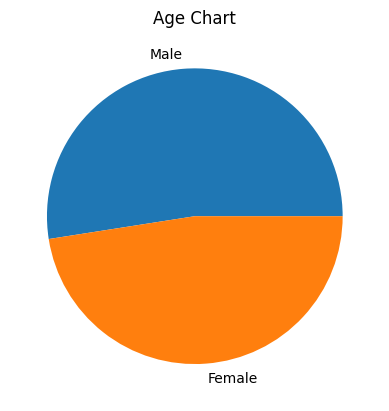

In [159]:
data.Gender.value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Age Chart')

Text(0.5, 1.0, 'Salary Chart')

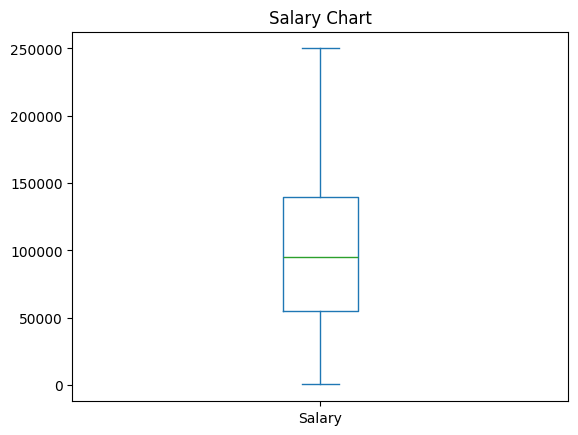

In [160]:
data.Salary.plot(kind='box')
plt.title('Salary Chart')

Text(0.5, 1.0, 'Education Level')

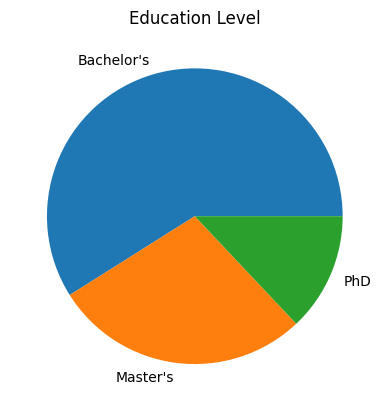

In [161]:
data['Education Level'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Education Level')

In [162]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Text(0.5, 1.0, 'Years of Experience Chart')

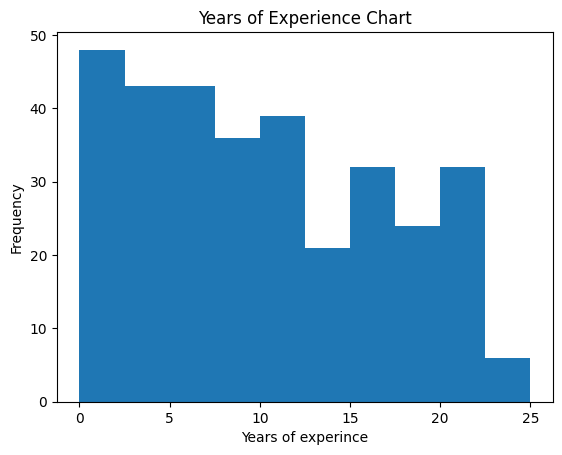

In [163]:
data['Years of Experience'].plot(kind='hist')
plt.xlabel('Years of experince')
plt.title('Years of Experience Chart')

In [164]:
label_encoder = LabelEncoder()
data['Gender Encode'] = label_encoder.fit_transform(data['Gender'])
data['Education Level Encode'] = label_encoder.fit_transform(data['Education Level'])
data['Job Title Encode'] = label_encoder.fit_transform(data['Job Title'])

In [165]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender Encode,Education Level Encode,Job Title Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [166]:
std_scaler = StandardScaler()
data['Age Scaled'] = std_scaler.fit_transform(data[['Age']])
data['Years of Experience Scaled'] = std_scaler.fit_transform(data[['Years of Experience']])

In [167]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender Encode,Education Level Encode,Job Title Encode,Age Scaled,Years of Experience Scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [168]:
x = data[['Age Scaled', 'Gender Encode', 'Education Level Encode', 'Job Title Encode', 'Years of Experience Scaled']]
y = data['Salary']

In [169]:
x.head()

,Age Scaled,Gender Encode,Education Level Encode,Job Title Encode,Years of Experience Scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [171]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_prediction = reg.predict(x_test)
y_prediction

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [172]:
df = pd.DataFrame({'Salary Actual':y_test, 'Salary Predicted':y_prediction})
df['Error'] = df['Salary Actual'] - df['Salary Predicted']
df.head()

,Salary Actual,Salary Predicted,Error
132,100000.0,117415.913446,-17415.913446
108,100000.0,125562.807428,-25562.807428
137,50000.0,48965.153862,1034.846138
9,110000.0,128739.348880,-18739.348880
181,105000.0,106828.499305,-1828.499305


In [173]:
print(f"Accuracy of the model : {round(r2_score(y_test,y_prediction),4)*100} %")

Accuracy of the model : 89.11 %


In [174]:
mse = mean_squared_error(y_test,y_prediction)
print(f"Mean Squared Error : {round(mean_squared_error(y_test,y_prediction),2)}")

Mean Squared Error : 205754135.72


In [175]:
print(f"Root Mean Squared Error : {round(mse**0.5,2)}")

Root Mean Squared Error : 14344.13


In [176]:
print(f"Mean Absolute Error : {round(mean_absolute_error(y_test,y_prediction),2)}")

Mean Absolute Error : 10570.79


In [177]:
reg.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

In [178]:
reg.intercept_

np.float64(86001.49320553176)

In [185]:
pickle.dump(reg, open("model", "wb"))
pickle.dump(data, open("data", "wb"))